<h1 style="text-align:center">Optymalizacja zmiany biegów samochodu</h1>

## Wstęp

Skrzynia zmiany biegów jest mechanizmem, który przekłada obroty silnika na koła pojazdu, umożliwiając ruszanie, przyspieszanie oraz jazdę z różnymi prędkościami. Poprzez dobór odpowiednich przełożeń pozwala ona utrzymać silnik w korzystnym zakresie obrotów. Niższe biegi zapewniają większą siłę napędową przy niskich prędkościach, natomiast wyższe biegi umożliwiają ekonomiczną jazdę ze stałą prędkością.

## Cel projektu

Celem projektu jest opracowanie strategii optymalnej zmiany biegów, która zmniejszy zużycie paliwa oraz emisję tlenków azotu. Odpowiedni dobór momentu zmiany biegu pozwala utrzymać silnik w obszarze najwyższej sprawności, co przekłada się na bardziej ekonomiczną i ekologiczną eksploatację pojazdu.

## Opis modelu

### Ruch samochodu
Zakładamy że samochód porusza się ruchem prostoliniowym, na twardej nawierzchni, układ napędowy jak i silnik nie tracą na sprawnosci. Wtedy ruch samochodu można opisać wzorem z II zasady dynamiki Newtona
$$\sum F = ma$$
Które można przekształcić na<sup><a href=#zrodlo1>1</a></sup>
$$\frac{dv}{dt} = \frac{1}{m}(F_{x}-F_{D}-F_{R}-F_{G})$$

gdzie   
$F_{x}$ - siła pociągowa   
$F_{D}$ - opór areodynamiczny   
$F_{R}$ - opór toczenia  
$F_{G}$ - opór nachylenia terenu  

#### Postacie poszczególnych sił

##### Siła pociągowa<sup><a href=#zrodlo1>1</a></sup>
Siła generowana przez układ napędowy, przenoszona na podłoże, która umożliwia ruch obiektu wynosi. Wpływ bezwładności elementów wirujących pominięto, zakładając że ich wkład do dynamiki ruchu pojazdu jest niewielki w porównaniu z masą pojazdu. W celu uproszczenia modelu i skupienia się na wpływie strategii zmiany biegów przyjęto stały moment obrotowy silnika($T_{Eng}$).

$$F_{x} = \frac{T_{Eng}R_{n}\eta}{r}$$
gdzie  
$T_{Eng}$ - moment obrotowy silnika  
$R_{n}$ - stosunek przełożenia n  
$\eta$ - sprawność układu napędowego  
$r$ - promień opony

##### Opór areodynamiczny<sup><a href=#zrodlo1>1</a></sup>
Opór areodynamiczny działający na rzut powierzchni przodu pojazdu $A_{f}$ przy prędkości $v$ opisuje wzór

$$F_{D} = \frac{1}{2}\rho c_{W}Sv^2$$
gdzie  
$\rho$ - gęstość powietrza  
$c_{W}$ - współczynnik oporu pojazdu  
$S$ - powierzchnia czołowa pojazdu

##### Opór toczenia<sup><a href=#zrodlo1>1</a></sup>
Opór toczenia wyraża wzór

$$F_{R} = \mu mg\cos(\theta)$$

gdzie  
$\mu$ - współczynnik tarcia toczenia  
$\theta$ - kąt nachylenia terenu
##### Opór nachylenia terenu(Siła gradientu)<sup><a href=#zrodlo1>1</a></sup>

$$F_{G} = mg\sin(\theta)$$

#### Równanie ruchu

Zgodnie z wyprowadzeniem wszystkich sił działających na pojazd i podstaweniu ich do równania otrzymujemy
$$\frac{dv}{dt} = \frac{1}{m}(\frac{T_{Eng}R_{n}\eta}{r}-\frac{1}{2}\rho c_{W}Sv^2-\mu mg\cos(\theta)-mg\sin(\theta))$$

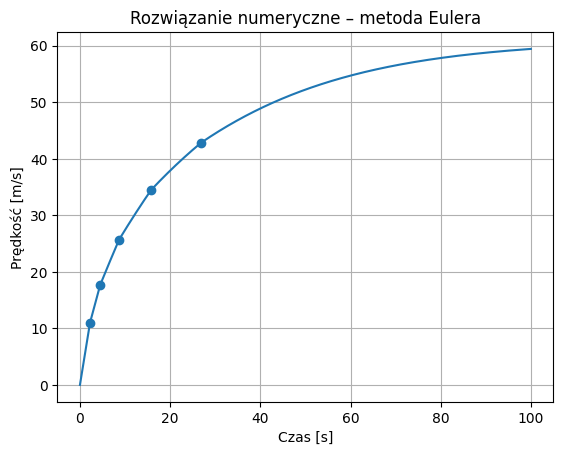

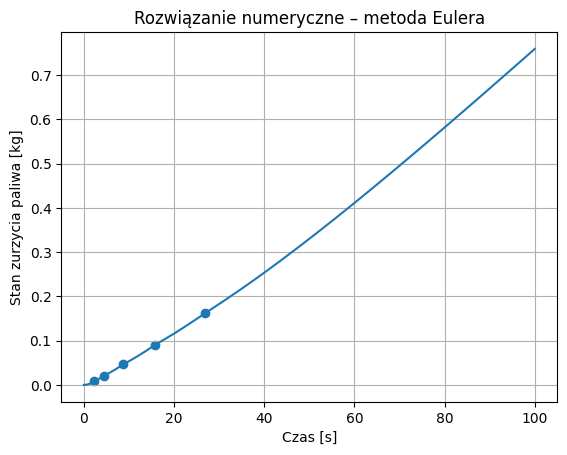

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parametry ---
m = 1500.0          # masa [kg]
T_Eng = 195.0       # moment silnika [Nm]
R = [13.0, 8.0, 5.5, 4.1, 3.3, 3.0]      # przełożenie
eta = 0.9           # sprawność [-]
r = 0.3             # promień koła [m]

rho = 1.225         # gęstość powietrza [kg/m^3]
c_W = 0.32          # współczynnik oporu
S = 2.2             # powierzchnia czołowa [m^2]

mu = 0.01          # współczynnik oporu toczenia
g = 9.81            # przyspieszenie ziemskie [m/s^2]
theta = 0.0         # kąt nachylenia drogi [rad]

# --- Parametry symulacji ---
dt = 0.01           # krok czasowy [s]
t_max = 100.0        # czas symulacji [s]

# --- Warunki początkowe ---
v0 = 0.0            # prędkość początkowa [m/s]

# --- Wektory czasu i prędkości ---
t = np.arange(0, t_max, dt)
v = np.zeros(len(t))
v[0] = v0
fuel = np.zeros(len(t))
fuel[0] = 0
H_u= 43*10**6
eta1 = 0.3
omega_max = 4500 * 2 * np.pi / 60
n = 0
list_v = []
list_t = []
list_f = []
for i in range(len(t) - 1):

    omega = (v[i] * R[n]) / r
    if omega > omega_max and n < len(R) - 1:
        list_t.append(t[i])
        list_v.append(v[i])
        list_f.append(fuel[i])
        n+=1
        omega = (v[i] * R[n]) / r
    dvdt = (1/m) * ((T_Eng * R[n] * eta) / r - 0.5 * rho * c_W * S * v[i]**2 - mu * m * g * np.cos(theta) - m * g * np.sin(theta))
    v[i + 1] = v[i] + dvdt * dt
    dpdt = (T_Eng) / (eta1 * H_u) * omega
    fuel[i + 1] = fuel[i] + dpdt * dt

# --- Wykres ---
plt.plot(t, v)
plt.scatter(list_t,list_v)
plt.xlabel("Czas [s]")
plt.ylabel("Prędkość [m/s]")
plt.title("Rozwiązanie numeryczne – metoda Eulera")
plt.grid()
plt.show()

plt.plot(t, fuel)
plt.scatter(list_t,list_f)
plt.xlabel("Czas [s]")
plt.ylabel("Stan zurzycia paliwa [kg]")
plt.title("Rozwiązanie numeryczne – metoda Eulera")
plt.grid()
plt.show()

### Notacja <div id="def"></div>
$t$ - czas($s$)  
$m$ - masa pojazdu($kg$)  
$v$ - prędkość pojazdu($\frac{m}{s}$)  
$a$ - przyspieszenie pojazdu($\frac{m}{s^2}$)  
$F_{x}$ - siła pociągowa($N$)  
$F_{D}$ - opór areodynamiczny($N$)  
$F_{R}$ - opór toczenia($N$)  
$F_{G}$ - opór nachylenia terenu($N$)  
$T_{Eng}$ - moment obrotowy silnika($\frac{N}{m}$)  
$R_{n}$ - stosunek przełożenia n  
$\eta$ - sprawność ukłądu napędowego  
$r$ - promień opony($m$)  
$\rho$ - gęstość powietrza  
$c_{W}$ - współczynnik oporu pojazdu  
$S$ - powierzchnia czołowa pojazdu($m^2$)  
$g$ - przyspieszenie ziemskie  
$\theta$ - kąt nachylenia terenu

## Bibliografia

1. Oglieve CJ, Mohammadpour M, Rahnejat H. Optimisation of the vehicle transmission and the gear-shifting strategy for the minimum fuel consumption and the minimum nitrogen oxide emissions. Proceedings of the Institution of Mechanical Engineers, Part D: Journal of Automobile Engineering. 2017;231(7):883-899. doi:10.1177/0954407017702985<div id="zrodlo1"></div>
  